### Data preparation

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns


In [2]:
# Looping through the folders to gather the information of all data files
file_path = 'data/A_DeviceMotion_data/'
folders = os.listdir(file_path)
files = {}
for f in folders:
    file = os.listdir(os.path.join(file_path, f))
    files[f] = file
                      
    

In [3]:
# Read the files containing the subject information
subject_info = pd.read_csv('data/data_subjects_info.csv')
subject_info.rename(columns = {'code':'subject'}, inplace = True)

In [4]:
# renaming the columns
folders_split = [f.split('_') for f in folders]
unique_activity = list(set([f[0] for f in folders_split]))
new_col = []
for act in unique_activity:
    k = 1
    for i in range(len(folders_split)):
        if act == folders_split[i][0]:
            new_col.append(f'{act}_{k}')
            k += 1
            
        

In [5]:
# create a dataframe and concat all data from different subjects and different activities: two columns are added that includes subject and the activity
data = []
for key, value in files.items():
    subjects = os.listdir(os.path.join(file_path, key))
    for sub in subjects:
        data_sub = pd.read_csv(os.path.join(file_path, key, sub))
        data_sub = data_sub.drop(columns = 'Unnamed: 0')
        data_sub['subject'] = f'{int(sub[4:-4])}'
        data_sub['activity'] = f'{key[:3]}'
        data.append(data_sub)
        
data = pd.concat(data)   

In [6]:
# Merging the subject_info and data dataframes
subject_info['subject'] = subject_info['subject'].astype('str') # changing the type of data in this column so they can be merged based on this column
merged_data = pd.merge(data, subject_info, on='subject', how='left')
df = merged_data

### Visualization of the features
The features are timeseries data, the sensor measurements over a period of time. Here are some examples of how they look like.

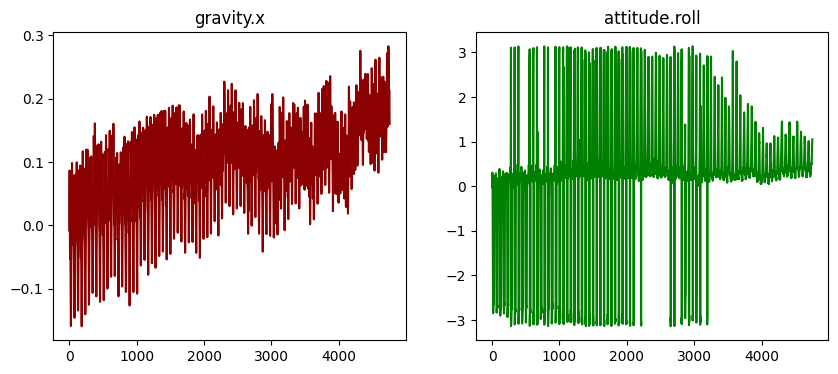

In [43]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].plot(data_sub['gravity.x'], color = 'darkred');
ax[0].set_title('gravity.x');
ax[1].plot(data_sub['attitude.roll'], color = 'green');
ax[1].set_title('attitude.roll');



### Exploratory data analysis

What is the shape, data types?

In [7]:
print(f'This dataset has {df.shape[0]} number of data points and {df.shape[1]} number of features.')

This dataset has 1412865 number of data points and 18 number of features.


In [8]:
# calculate the magnitude of the gravity, rotation rate, and userAcceleration
df['gravity'] = np.sqrt(df['gravity.x']**2 + df['gravity.y']**2 + df['gravity.z']**2)
df['rotationRate'] = np.sqrt(df['rotationRate.x']**2 + df['rotationRate.y']**2 + df['rotationRate.z']**2)
df['userAcceleration'] = np.sqrt(df['userAcceleration.x']**2 + df['userAcceleration.y']**2 + df['userAcceleration.z']**2)

In [9]:
df.dtypes

attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
subject                object
activity               object
weight                  int64
height                  int64
age                     int64
gender                  int64
gravity               float64
rotationRate          float64
userAcceleration      float64
dtype: object

In [10]:
df.describe()

attitude.roll  attitude.pitch  attitude.yaw     gravity.x  \
count   1.412865e+06    1.412865e+06  1.412865e+06  1.412865e+06   
mean   -1.760427e-01   -9.866487e-01 -1.492687e-01  4.213359e-02   
std     1.566652e+00    4.940860e-01  1.544769e+00  3.388300e-01   
min    -3.141590e+00   -1.569974e+00 -3.141588e+00 -9.998220e-01   
25%    -1.480050e+00   -1.358278e+00 -1.277552e+00 -1.725300e-01   
50%     1.222180e-01   -1.181032e+00 -1.356530e-01  1.991400e-02   
75%     8.763600e-01   -6.233930e-01  8.291430e-01  2.721440e-01   
max     3.141579e+00    1.567175e+00  3.141584e+00  9.999980e-01   

          gravity.y     gravity.z  rotationRate.x  rotationRate.y  \
count  1.412865e+06  1.412865e+06    1.412865e+06    1.412865e+06   
mean   7.547222e-01 -1.388248e-01    5.321167e-03    1.458119e-02   
std    3.332649e-01  4.283231e-01    1.292916e+00    1.226470e+00   
min   -9.999930e-01 -9.999990e-01   -1.736579e+01   -1.841441e+01   
25%    5.837930e-01 -3.922410e-01   -2.860300e-01   -1.669860e-01   
50%    9.249990e-01 -9.690200e-02   -3.940000e-04    3.250000e-04   
75%    9.775030e-01  8.488200e-02    1.163210e-01    2.312710e-01   
max    1.000000e+00  9.813120e-01    1.046806e+01    1.754312e+01   

       rotationRate.z  userAcceleration.x  userAcceleration.y  \
count    1.412865e+06        1.412865e+06        1.412865e+06   
mean     1.276031e-02       -3.910640e-03        4.424380e-02   
std      8.080411e-01        3.282090e-01        5.275663e-01   
min     -1.215124e+01       -6.369264e+00       -5.673592e+00   
25%     -9.733300e-02       -4.751300e-02       -6.213600e-02   
50%      1.770000e-04        8.910000e-04        4.336000e-03   
75%      1.133280e-01        4.428400e-02        5.176600e-02   
max      1.143624e+01        7.120793e+00        7.322722e+00   

       userAcceleration.z        weight        height           age  \
count        1.412865e+06  1.412865e+06  1.412865e+06  1.412865e+06   
mean         3.927177e-02  7.212055e+01  1.739890e+02  2.883202e+01   
std          3.762121e-01  1.598129e+01  8.798617e+00  5.303463e+00   
min         -7.743481e+00  4.800000e+01  1.610000e+02  1.800000e+01   
25%         -2.361300e-02  6.000000e+01  1.640000e+02  2.500000e+01   
50%          3.433000e-03  7.200000e+01  1.750000e+02  2.800000e+01   
75%          1.047770e-01  7.800000e+01  1.800000e+02  3.100000e+01   
max          8.125357e+00  1.020000e+02  1.900000e+02  4.600000e+01   

             gender       gravity  rotationRate  userAcceleration  
count  1.412865e+06  1.412865e+06  1.412865e+06      1.412865e+06  
mean   5.736535e-01  9.999925e-01  1.244030e+00      4.253801e-01  
std    4.945456e-01  1.472572e-05  1.510491e+00      5.917344e-01  
min    0.000000e+00  9.998122e-01  1.791647e-05      1.177879e-04  
25%    0.000000e+00  9.999916e-01  2.777450e-02      2.662709e-02  
50%    1.000000e+00  9.999972e-01  6.943342e-01      1.971418e-01  
75%    1.000000e+00  9.999996e-01  2.070832e+00      6.181895e-01  
max    1.000000e+00  1.000001e+00  2.196801e+01      1.011331e+01

In [11]:
# are there any null values?
df.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
subject               0
activity              0
weight                0
height                0
age                   0
gender                0
gravity               0
rotationRate          0
userAcceleration      0
dtype: int64

Text(0.5, 1.0, 'Gender balance of the participants')

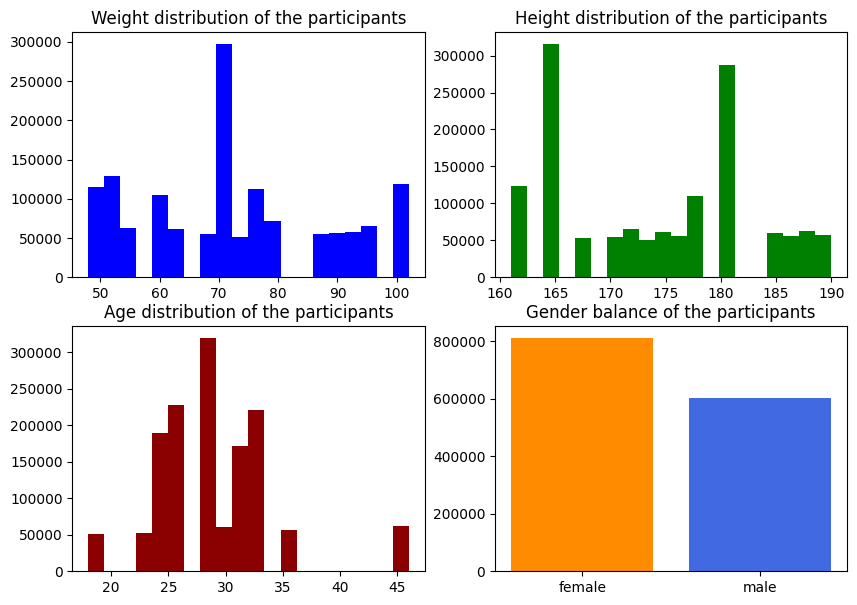

In [12]:
# VIsualization of the subjects
fig, ax = plt.subplots(2,2, figsize = (10,7))
gender_counts = df['gender'].value_counts()

ax[0,0].hist(df['weight'], bins = 20, color = 'blue');
ax[0,0].set_title('Weight distribution of the participants')
ax[0,1].hist(df['height'], bins = 20, color = 'green');
ax[0,1].set_title('Height distribution of the participants')
ax[1,0].hist(df['age'], bins = 20, color = 'darkred');
ax[1,0].set_title('Age distribution of the participants')
ax[1,1].bar(['female', 'male'], gender_counts.values, color = ['darkorange','royalblue']);
ax[1,1].set_title('Gender balance of the participants')



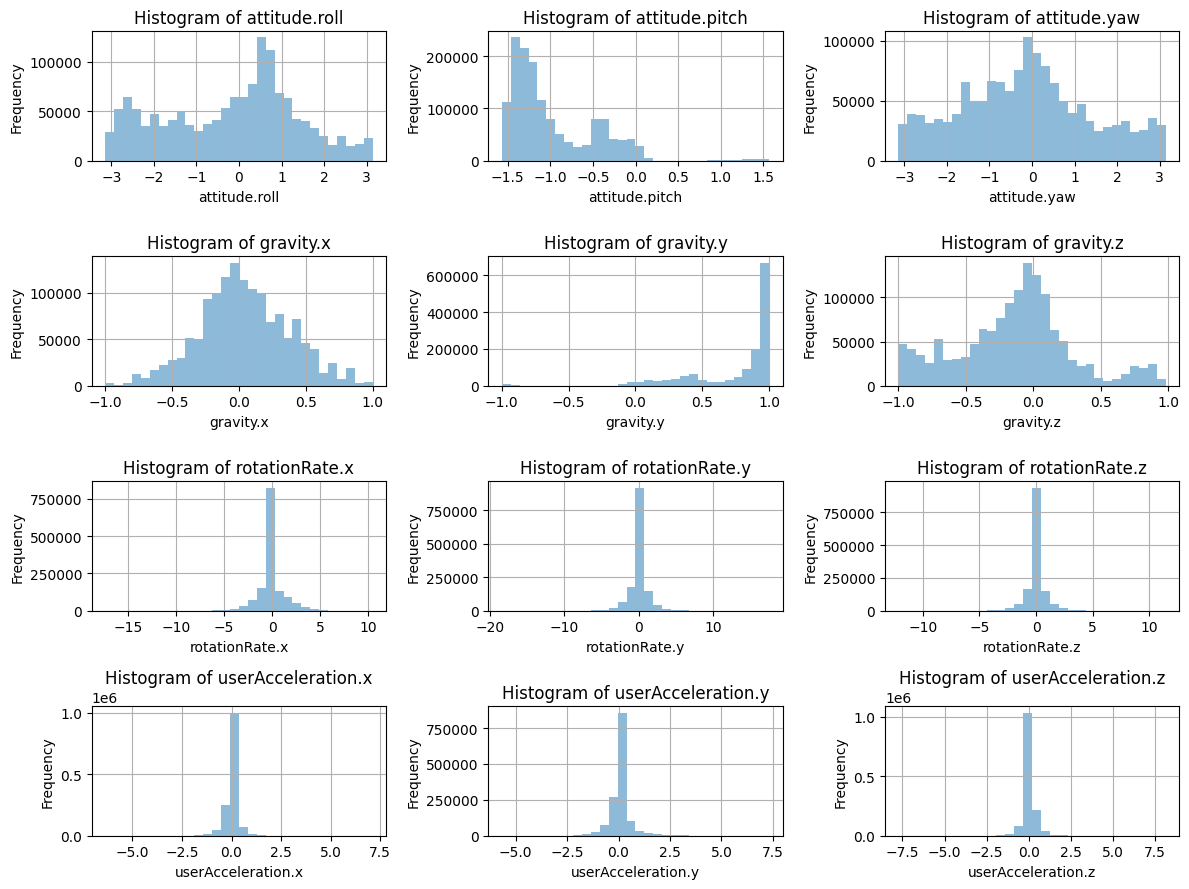

In [13]:
# Plot the distribution of the sensor data
fig, axs = plt.subplots(4, 3, figsize=(12, 9))
axs = axs.flatten()  # Flatten the axs array for easier iteration

# List of column names to plot
columns_to_plot = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
                   'gravity.x', 'gravity.y', 'gravity.z',
                   'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
                   'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

# Iterate through each column and plot the histogram in a subplot
for i, col in enumerate(columns_to_plot):
    ax = axs[i]  # Select the current subplot
    df[col].hist(alpha=0.5, ax=ax, bins=30)  # Plot the histogram
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

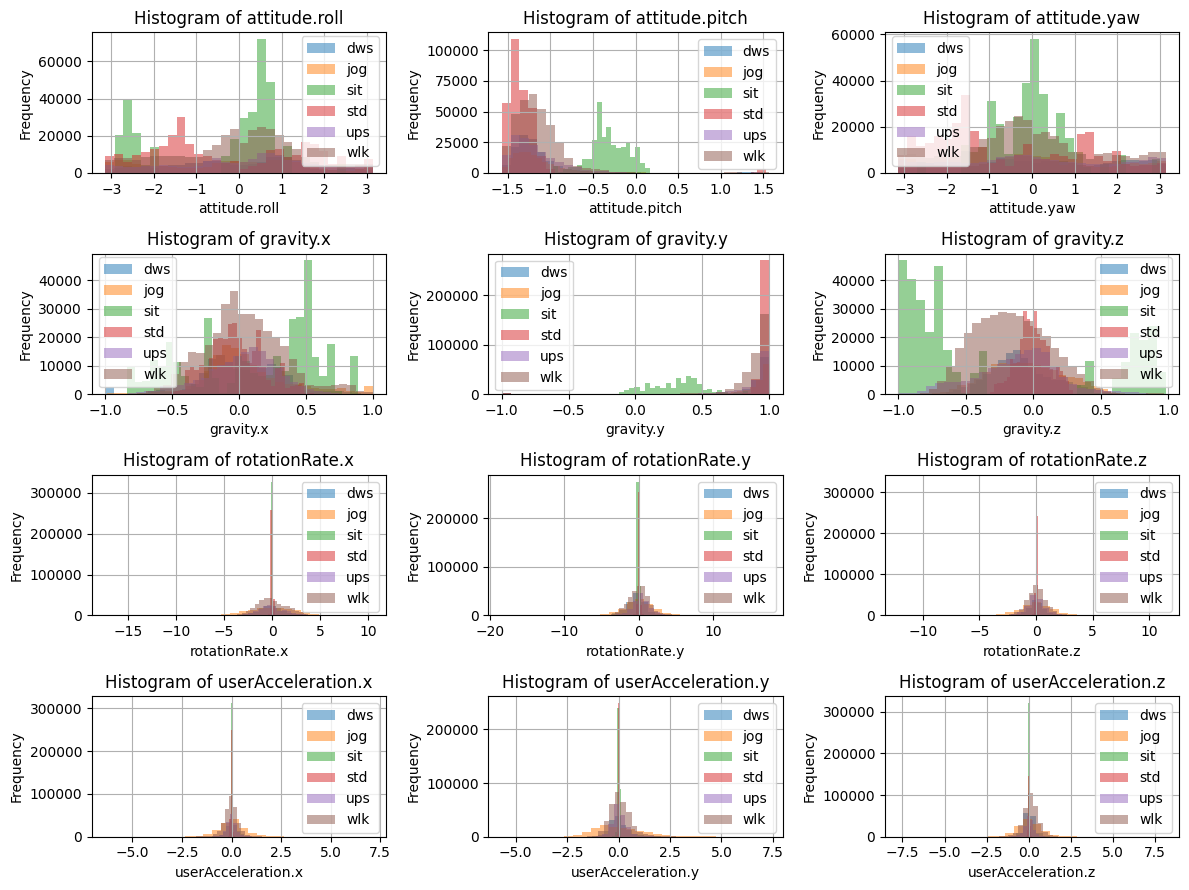

In [14]:
# Plot the distribution for each activity to see if distinction exists
fig, axs = plt.subplots(4, 3, figsize=(12, 9))
axs = axs.flatten()  # Flatten the axs array for easier iteration

# List of column names to plot
columns_to_plot = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
                   'gravity.x', 'gravity.y', 'gravity.z',
                   'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
                   'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

# Iterate through each column and plot the histogram for each activity in a subplot
for i, col in enumerate(columns_to_plot):
    ax = axs[i]  # Select the current subplot
    for name, group in df.groupby('activity'):
        group[col].hist(alpha=0.5, ax=ax, label=name, bins=30)  # Plot the histogram for each activity
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')
    ax.legend()
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Initialize empty lists for storing statistics
stats_data = []

# Calculate mean and median for each signal column grouped by activity
for col in columns_to_plot:
    for name, group in df.groupby('activity')[col]:
        signal_mean = group.mean()
        signal_median = group.median()
        signal_std = group.std()
        signal_skewness = group.skew()
        signal_kurtosis = group.kurtosis()
        activity = name
        stats_data.append({'activity': activity, 'signal': col, 'signal_mean': signal_mean, 'signal_std':signal_std, 'signal_median': signal_median, 'signal_skew':signal_skewness, 'signal_kurtosis':signal_kurtosis}) # dictionary in list

# Create DataFrame to store statistics
stats = pd.DataFrame(stats_data)
   

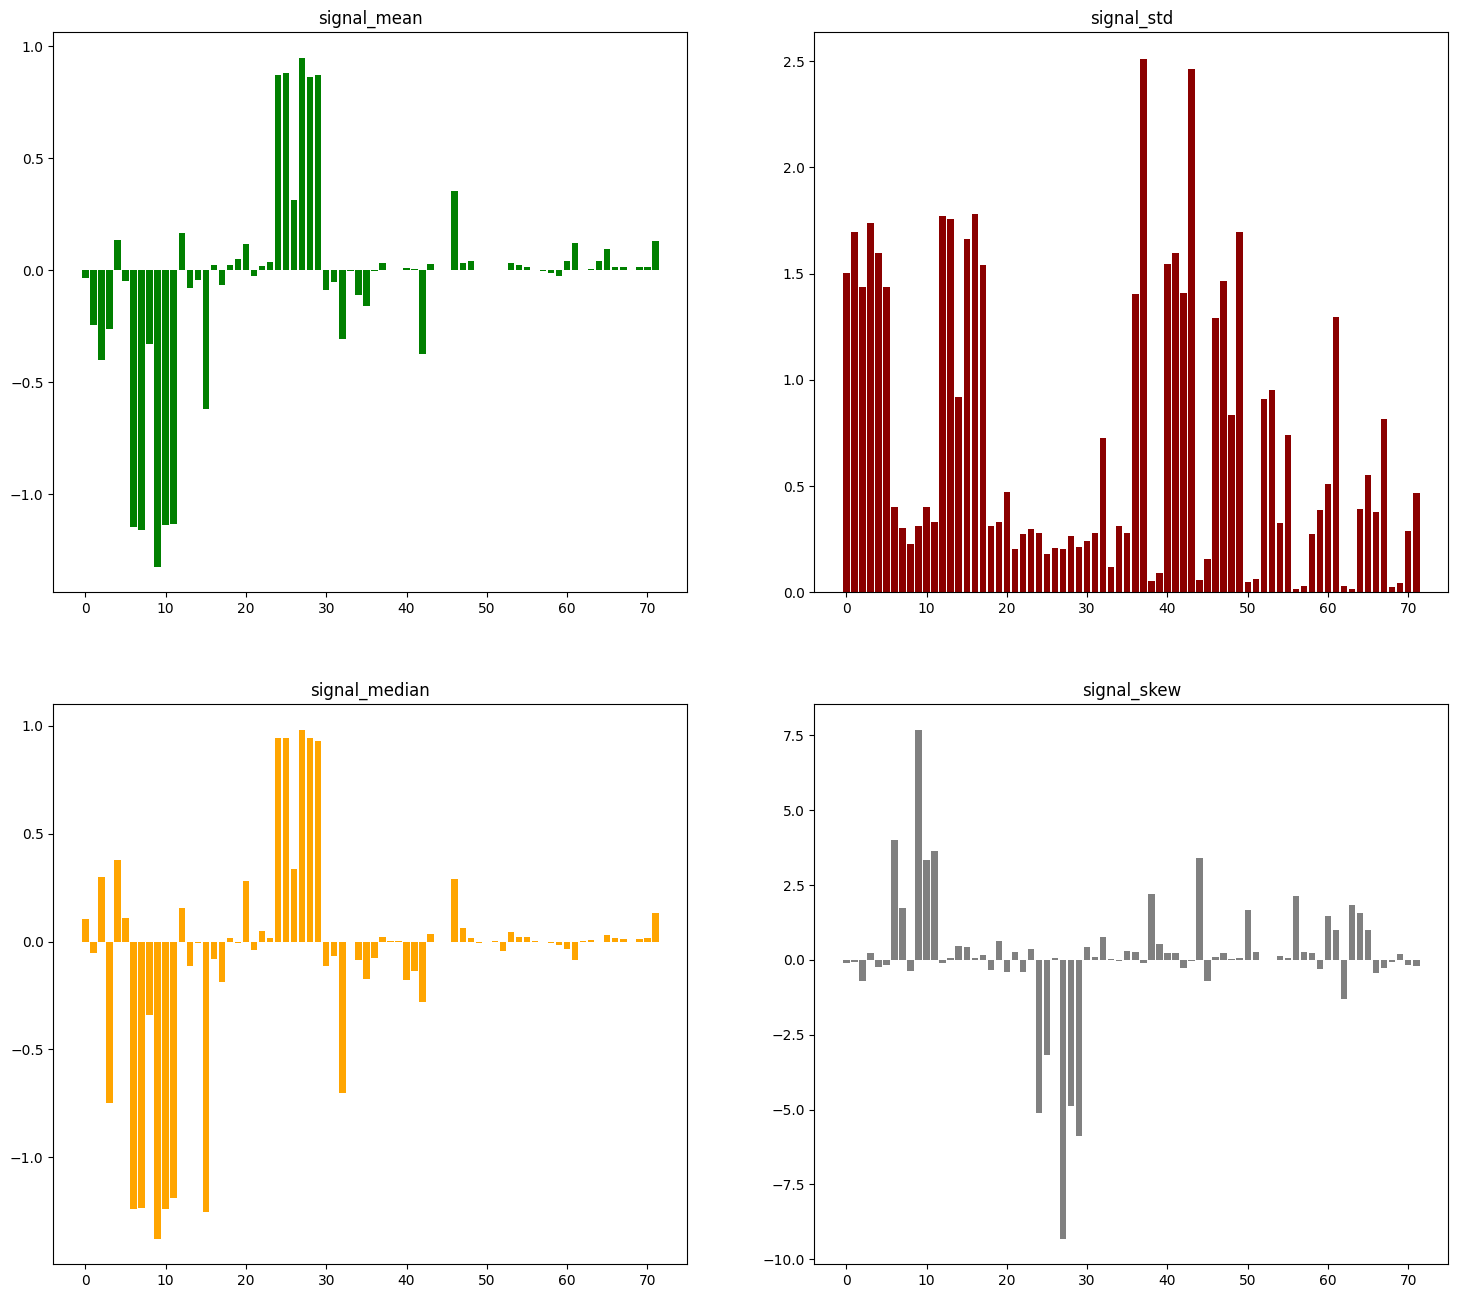

In [39]:
# visualizing the statistics, shows significant difference between different signal levels and activity type
fig, axs = plt.subplots(2,2, figsize = (18, 16))
axs = axs.flatten()
col_to_plot = stats[['signal_mean','signal_std','signal_median','signal_skew']]
color = ['green','darkred','orange','gray']

for i, ax in enumerate(axs):
    ax.bar(col_to_plot.index, col_to_plot.iloc[:,i], color = color[i])
    ax.set_title(col_to_plot.columns[i])
    

In [31]:
stats

activity              signal  signal_mean  signal_std  signal_median  \
0       dws       attitude.roll    -0.033188    1.501828       0.103663   
1       jog       attitude.roll    -0.243816    1.697037      -0.054606   
2       sit       attitude.roll    -0.401699    1.436530       0.300983   
3       std       attitude.roll    -0.263079    1.740015      -0.746876   
4       ups       attitude.roll     0.137404    1.598156       0.377413   
..      ...                 ...          ...         ...            ...   
67      jog  userAcceleration.z     0.013132    0.814416       0.011907   
68      sit  userAcceleration.z     0.001152    0.022515      -0.003069   
69      std  userAcceleration.z     0.014128    0.042866       0.009997   
70      ups  userAcceleration.z     0.016203    0.286256       0.016796   
71      wlk  userAcceleration.z     0.128586    0.465671       0.130117   

    signal_skew  signal_kurtosis  
0     -0.114471        -0.777695  
1     -0.078342        -1.010337  
2     -0.694048        -1.051430  
3      0.233889        -1.239722  
4     -0.224296        -0.739786  
..          ...              ...  
67    -0.266911         5.207277  
68    -0.081471       163.773353  
69     0.207911         6.515094  
70    -0.177498         3.972367  
71    -0.200454         3.356355  

[72 rows x 7 columns]